In [1]:
# Importing Important Libraries

import pandas as pd
import numpy as np

# visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Avoid Warnings
import warnings 
warnings.filterwarnings('ignore')

# To print all rows and columns
from IPython import display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)



### Data Collection :

In [2]:
df = pd.read_csv('movies_data.csv')
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


### Data Preprocessing :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [4]:
df.shape

(979, 6)

In [5]:
df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=979, step=1)

In [7]:
df.axes

[RangeIndex(start=0, stop=979, step=1),
 Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
        'actors_list'],
       dtype='object')]

In [8]:
df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [9]:
df.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [10]:
df.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

### Content_rating :

In [11]:
df['content_rating'].unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [12]:
df['content_rating'].nunique()

12

In [13]:
df['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [14]:
df['content_rating'].isna().sum()

3

In [15]:
df['content_rating'].dtypes

dtype('O')

In [17]:
mode = df['content_rating'].mode()[0]
mode

'R'

In [18]:
df['content_rating'].fillna(mode,inplace=True)

In [19]:
df['content_rating'].isna().sum()

0

In [20]:
df.isna().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [ ]:
# All the missing values are successfully removed 

### Data Visualization :

<Axes: xlabel='genre', ylabel='Count'>

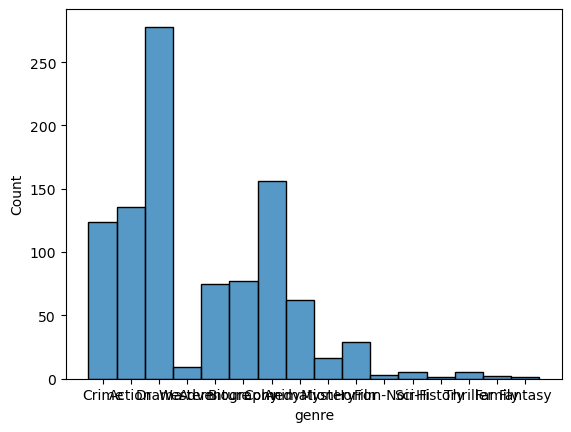

In [21]:
sns.histplot(df['genre'])

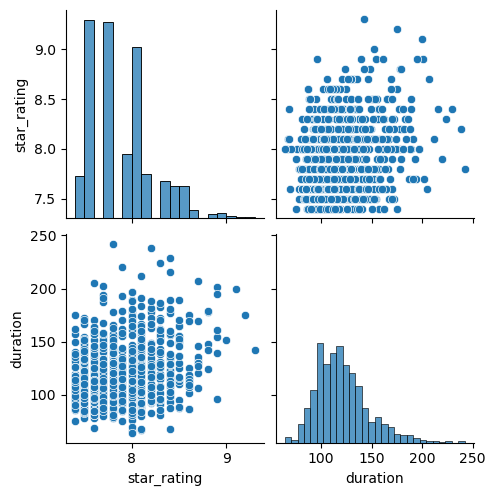

In [23]:
sns.pairplot(df)

In [ ]:
# There are no Missing values in the dataset

## Handling Outliers :

In [25]:
df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

<Axes: >

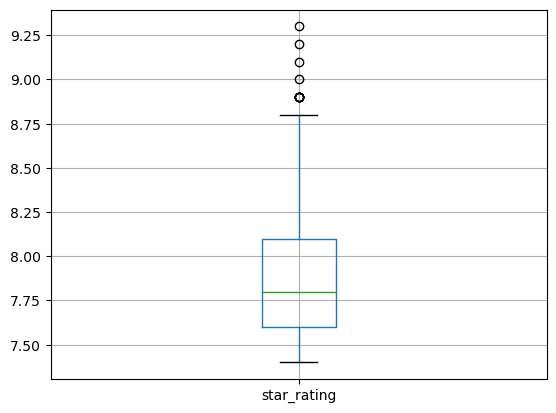

In [26]:
df[['star_rating']].boxplot()

In [27]:
q1 = df['star_rating'].quantile(0.25)
q3 = df['star_rating'].quantile(0.75)

median = df['star_rating'].median()
IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q3 - 1.5 * IQR

print('First Quantile : ',q1)
print('Third Quantile : ',q3)

print('IQR :-->',IQR)

print('Upper_tail :-->',upper_tail)
print('Lower tail:',lower_tail)



First Quantile :  7.6
Third Quantile :  8.1
IQR :--> 0.5
Upper_tail :--> 8.85
Lower tail: 7.35


In [28]:
df['star_rating'].loc[df['star_rating']> upper_tail]

0    9.3
1    9.2
2    9.1
3    9.0
4    8.9
5    8.9
6    8.9
7    8.9
8    8.9
9    8.9
Name: star_rating, dtype: float64

In [29]:
df['star_rating'].loc[df['star_rating'] > upper_tail] = upper_tail

In [30]:
df['star_rating'].loc[df['star_rating'] > upper_tail]

Series([], Name: star_rating, dtype: float64)

<Axes: >

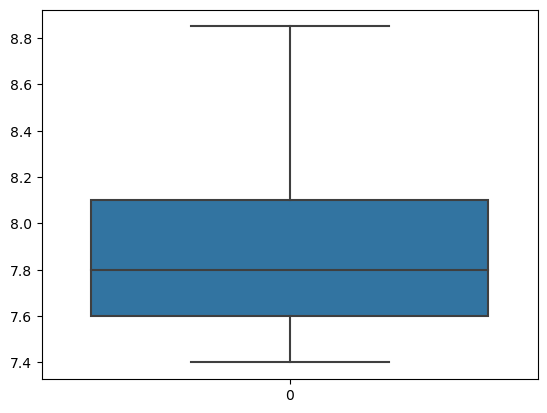

In [31]:
sns.boxplot(df['star_rating'])

## Groupby function :

In [32]:
df.groupby('genre').first().head()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,8.85,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.85,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.60,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.85,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.60,Life Is Beautiful,PG-13,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."


## Crosstab Function :

In [33]:
pd.crosstab(df['genre'],df['title']).head()

title,(500) Days of Summer,12 Angry Men,12 Years a Slave,127 Hours,2001: A Space Odyssey,2046,21 Grams,25th Hour,28 Days Later...,3 Idiots,3-Iron,300,3:10 to Yuma,"4 Months, 3 Weeks and 2 Days",42,50/50,8 1/2,A Beautiful Mind,A Bridge Too Far,A Bronx Tale,A Christmas Story,A Clockwork Orange,A Few Good Men,A Fish Called Wanda,A Fistful of Dollars,A Hard Day's Night,A History of Violence,A Nightmare on Elm Street,A Perfect World,A Prophet,A Royal Affair,A Simple Plan,A Single Man,A Streetcar Named Desire,A Very Long Engagement,About Time,Across the Universe,Adam's Apples,Adaptation.,After Hours,"Aguirre, the Wrath of God",Airplane!,Akira,Aladdin,Alice in Wonderland,Alien,Aliens,All About Eve,All About My Mother,All Quiet on the Western Front,All the President's Men,Almost Famous,Amadeus,Amarcord,Amelie,American Beauty,American Gangster,American Graffiti,American History X,American Psycho,American Splendor,Amores Perros,Amour,An American Werewolf in London,Anatomy of a Murder,Animal House,Annie Hall,Apocalypse Now,Apocalypto,Apollo 13,Argo,Army of Darkness,Arsenic and Old Lace,As Good as It Gets,Atonement,August Rush,Avatar,Awakenings,Babel,Back to the Future,Back to the Future Part II,Back to the Future Part III,Bad Education,Badlands,Barfi!,Barry Lyndon,Barton Fink,Batman,Batman Begins,Battle Royale,Battleship Potemkin,Beauty and the Beast,Beetlejuice,Before Midnight,Before Sunrise,Before Sunset,Begin Again,Being John Malkovich,Being There,Belle de Jour,Ben-Hur,Best in Show,Bicycle Thieves,Big Fish,Big Hero 6,Billy Elliot,Birdman: Or (The Unexpected Virtue of Ignorance),Biutiful,Black Book,"Black Cat, White Cat",Black Hawk Down,Black Swan,Blade Runner,Blazing Saddles,Blood Diamond,Blood Simple.,Blow,Blow-Up,Blue Is the Warmest Color,Blue Valentine,Blue Velvet,Bonnie and Clyde,Boogie Nights,Bound,Boy A,Boyhood,Boys Don't Cry,Boyz n the Hood,Braindead,Braveheart,Brazil,Breakfast at Tiffany's,Breaking the Waves,Breathless,Brick,Bringing Up Baby,Brokeback Mountain,Buffalo '66,Bullets Over Broadway,Bullitt,Butch Cassidy and the Sundance Kid,Cabaret,Calvary,Capote,Captain America: The Winter Soldier,Captain Phillips,Carlito's Way,Casablanca,Casino,Casino Royale,Cast Away,Castle in the Sky,Cat on a Hot Tin Roof,Catch Me If You Can,Central Station,Changeling,Chaplin,Charade,Children of Men,Chinatown,Christmas Vacation,Chungking Express,Cinderella Man,Cinema Paradiso,Citizen Kane,City Lights,City of God,Clerks,Clerks II,Close Encounters of the Third Kind,Cloud Atlas,Collateral,Control,Cool Hand Luke,Coraline,Cowboy Bebop: The Movie,Crash,"Crazy, Stupid, Love.",Crimes and Misdemeanors,"Crouching Tiger, Hidden Dragon",Dallas Buyers Club,Dancer in the Dark,Dances with Wolves,Dangerous Liaisons,Dark City,Das Boot,Dawn of the Dead,Dawn of the Planet of the Apes,Days of Heaven,Dazed and Confused,Dead Man,Dead Man Walking,Dead Poets Society,Death at a Funeral,Deconstructing Harry,Delicatessen,Deliverance,Departures,Despicable Me,Despicable Me 2,Detachment,Devil's Advocate,Diabolique,Dial M for Murder,Die Hard,Die Hard: With a Vengeance,Dil Chahta Hai,Dilwale Dulhania Le Jayenge,Dirty Harry,Disconnect,District 9,Django Unchained,Do the Right Thing,Doctor Zhivago,Dog Day Afternoon,Dogville,Donnie Brasco,Donnie Darko,Double Indemnity,Doubt,Down by Law,Downfall,Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb,Dracula,Drive,Driving Miss Daisy,Duck Soup,E.T. the Extra-Terrestrial,East of Eden,Eastern Promises,Ed Wood,Edge of Tomorrow,Edward Scissorhands,Elite Squad,Elite Squad: The Enemy Within,Elizabeth,Empire of the Sun,End of Watch,Enemy at the Gates,Enter the Dragon,Equilibrium,Eraserhead,Escape from Alcatraz,Eternal Sunshine of the Spotless Mind,Everything Is Illuminated,Evil,Evil Dead II,Excalibur,Falling Down,Fanny and Alexander,Fantasia,Fantastic Mr. Fox,Far from Heaven,Fargo,Fear and Loathing in Las Vegas,Fearless,Felon,Ferris Bueller's Day Off,Fiddler on the Roof,Field of Dreams,Fight Club,Finding Nemo,Finding Neverlan

## Feature Selection :

### i) Linearity :

In [35]:
r = df.corr()[['star_rating']]
r

,star_rating
star_rating,1.000000
duration,0.223114


<Axes: >

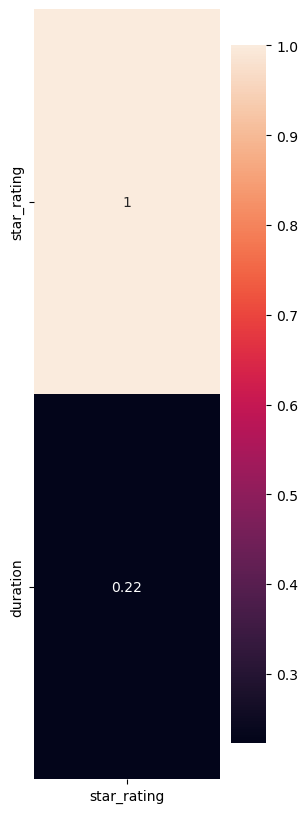

In [36]:
plt.figure(figsize = (3,10))
sns.heatmap(r,annot = True)

### ii) Multicollinearity :

In [37]:
df1 = df.drop('star_rating',axis = 1)
df1.head()

,title,content_rating,genre,duration,actors_list
0,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model Building :

In [31]:
from sklearn.linear_model import LinearRegression

In [39]:
x = df.drop('star_rating',axis = 1)
y = df['star_rating']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2 , random_state = 42)

In [35]:
model = LinearRegression()